# Microsoft Malware Detection 

In [3]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import warnings 
warnings.filterwarnings('ignore')

In [20]:
source='train'
destination='byteFiles'

#check if bytefile name directory exists or not if not then create new directory with bytefile name 
if not os.path.isdir(destination):
    os.mkdir(destination)

#if directory with name train present then separate .asm files and .byte files into separate directory with names byteFiles and asmFiles 
if os.path.isdir(source):
    os.rename(source,'asmFiles')
    source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith("bytes")):
            source_path = os.path.join(source, file)
            destination_path = os.path.join(destination, file)

            # Move the file from source to destination
            shutil.move(source_path, destination_path)

# Distribution of Malware Classes  

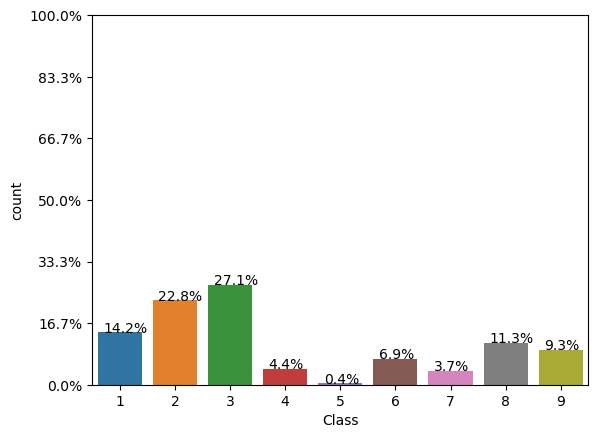

In [12]:
classY=pd.read_csv("trainLabels.csv")
total = len(classY)
ax=sns.countplot(x="Class", data=classY)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 7))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()